In [1]:
# run our base notebook

In [2]:
%run ./Base.ipynb

In [3]:
import pandas as pd

covid_flu = pd.read_csv('../data/covid_flu.csv')

In [4]:
# Exploratory Data Analysis

In [5]:
covid_flu.head()  # take a look at the first 5 rows

,Diagnosis,InitialPCRDiagnosis,Age,Sex,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,CReactiveProteinLevels,DurationOfIllness,CTscanResults,RiskFactors,GroundGlassOpacity,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Temperature,Fatigue
0,H1N1,NaN,67.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,No,NaN,38.111111,No
1,H1N1,NaN,29.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,H1N1,NaN,22.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,H1N1,NaN,20.0,F,NaN,NaN,NaN,NaN,NaN,NaN,immuno,NaN,NaN,Yes,Yes,NaN,No,NaN,36.555556,Yes
4,H1N1,NaN,21.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
covid_flu.shape  # 20 columns!

(1482, 20)

In [7]:
covid_flu.isnull().mean()  # percent of missing data in each column

Diagnosis                      0.000000
InitialPCRDiagnosis            0.929825
Age                            0.018893
Sex                            0.051282
neutrophil                     0.930499
serumLevelsOfWhiteBloodCell    0.898111
lymphocytes                    0.894737
CReactiveProteinLevels         0.907557
DurationOfIllness              0.941296
CTscanResults                  0.892713
RiskFactors                    0.858974
GroundGlassOpacity             0.937247
Diarrhea                       0.696356
Fever                          0.377193
Coughing                       0.420378
ShortnessOfBreath              0.949393
SoreThroat                     0.547908
NauseaVomitting                0.715924
Temperature                    0.576248
Fatigue                        0.641700
dtype: float64

In [8]:
covid_flu['Diagnosis'].value_counts(normalize=True)  # percent breakdown of response variable

H1N1       0.723347
COVID19    0.276653
Name: Diagnosis, dtype: float64

In [9]:
covid_flu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482 entries, 0 to 1481
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Diagnosis                    1482 non-null   object 
 1   InitialPCRDiagnosis          104 non-null    object 
 2   Age                          1454 non-null   float64
 3   Sex                          1406 non-null   object 
 4   neutrophil                   103 non-null    float64
 5   serumLevelsOfWhiteBloodCell  151 non-null    float64
 6   lymphocytes                  156 non-null    float64
 7   CReactiveProteinLevels       137 non-null    object 
 8   DurationOfIllness            87 non-null     float64
 9   CTscanResults                159 non-null    object 
 10  RiskFactors                  209 non-null    object 
 11  GroundGlassOpacity           93 non-null     object 
 12  Diarrhea                     450 non-null    object 
 13  Fever             

In [10]:
numeric_types = ['float16', 'float32', 'float64', 'int16', 'int32', 'int64']  # the numeric types in Pandas

numerical_columns = covid_flu.select_dtypes(include=numeric_types).columns.tolist()

numerical_columns

['Age',
 'neutrophil',
 'serumLevelsOfWhiteBloodCell',
 'lymphocytes',
 'DurationOfIllness',
 'Temperature']

In [11]:
from sklearn.impute import SimpleImputer  # sklearn class to impute missing data

num_impute = SimpleImputer(strategy='mean')  # could be mean or median for numerical values

print(covid_flu['lymphocytes'].head())  # show the first 5 values before imputing

print(f"\n\nMean of Lymphocytes column is {covid_flu['lymphocytes'].mean()}\n\n")

print(num_impute.fit_transform(covid_flu[['lymphocytes']])[:5])  # transforming turns the column into a numpy array

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: lymphocytes, dtype: float64


Mean of Lymphocytes column is 1.8501538461538463


[[1.85015385]
 [1.85015385]
 [1.85015385]
 [1.85015385]
 [1.85015385]]


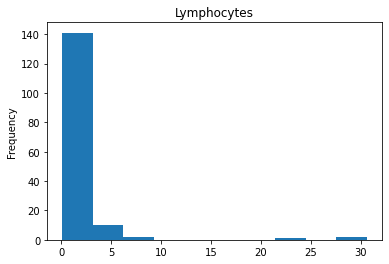

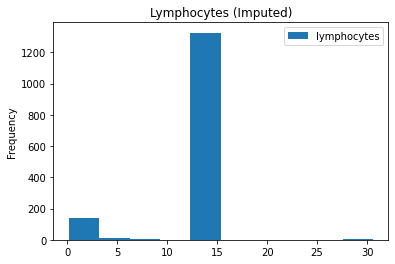

In [12]:
# https://feature-engine.readthedocs.io
import matplotlib.pyplot as plt

from feature_engine.imputation import EndTailImputer

covid_flu['lymphocytes'].plot(
    title='Lymphocytes', kind='hist', xlabel='cells/μL'
)

name = 'lymphocytes unimputed'
plt.savefig(f'{name}.svg', dpi=500)
plt.savefig(f'{name}.png', dpi=500)

EndTailImputer().fit_transform(covid_flu[['lymphocytes']]).plot(
    title='Lymphocytes (Imputed)', kind='hist', xlabel='cells/μL'
)

name = 'lymphocytes imputed'
plt.savefig(f'{name}.svg', dpi=500)
plt.savefig(f'{name}.png', dpi=500)


In [13]:
cat_impute = SimpleImputer(strategy='most_frequent')  # could be most_frequent or constant (arbitrary) for categorical values

print(covid_flu['Coughing'].head())

print(cat_impute.fit_transform(covid_flu[['Coughing']])[:5])  # transforming turns the column into a numpy array

0    Yes
1    NaN
2    NaN
3    Yes
4    NaN
Name: Coughing, dtype: object
[['Yes']
 ['Yes']
 ['Yes']
 ['Yes']
 ['Yes']]


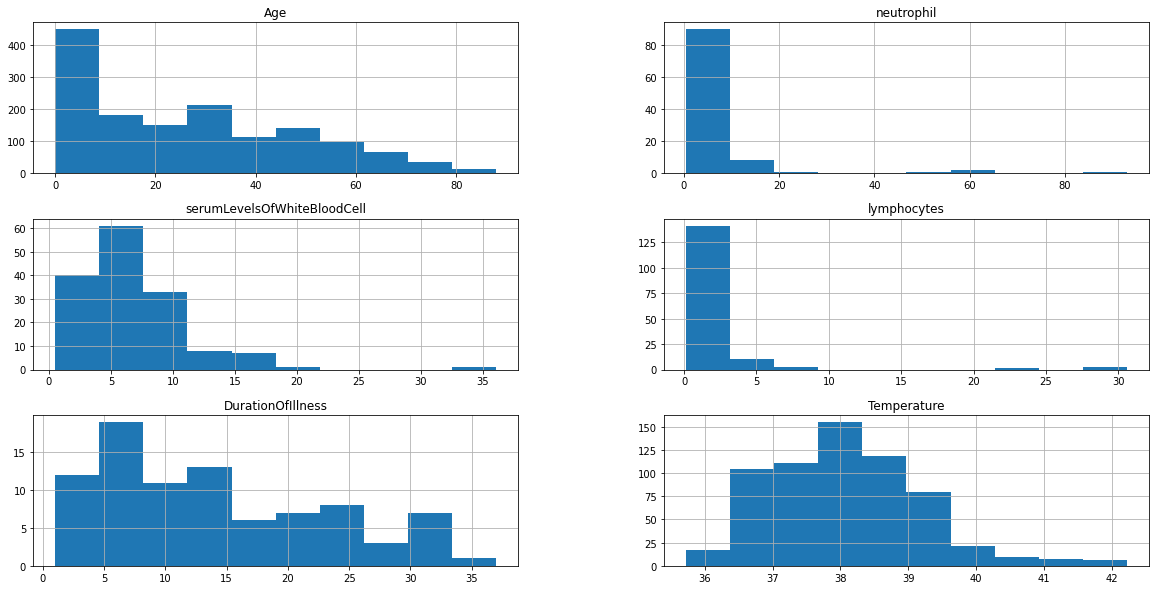

In [14]:
# looks like our numerical columns are hairly heavily right skewed

covid_flu[numerical_columns].hist(figsize=(20, 10))  

name = 'bunch of histograms'
plt.savefig(f'{name}.svg', dpi=500)
plt.savefig(f'{name}.png', dpi=500)


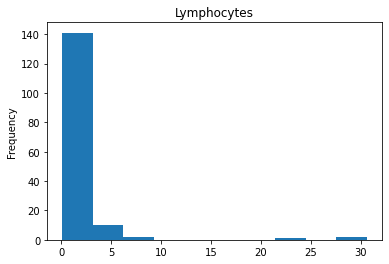

In [15]:
covid_flu['lymphocytes'].plot(
    title='Lymphocytes', kind='hist', xlabel='cells/μL'
)  # before log transform

name = 'lymphocytes before transform'
plt.savefig(f'{name}.svg', dpi=500)
plt.savefig(f'{name}.png', dpi=500)


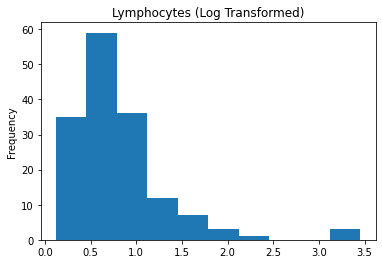

In [16]:
covid_flu['lymphocytes'].map(np.log1p).plot(
    title='Lymphocytes (Log Transformed)', kind='hist', xlabel='cells/μL'
)  # log transform of lymphocytes

name = 'lymphocytes log transform'
plt.savefig(f'{name}.svg', dpi=500)
plt.savefig(f'{name}.png', dpi=500)


In [17]:
# looks like Age may have some 0s in it which won't work with Box-Cox
covid_flu[covid_flu['Age']==0].head(3)

covid_flu['Age'] = covid_flu['Age'] + 0.01  # to make Age strictly positive

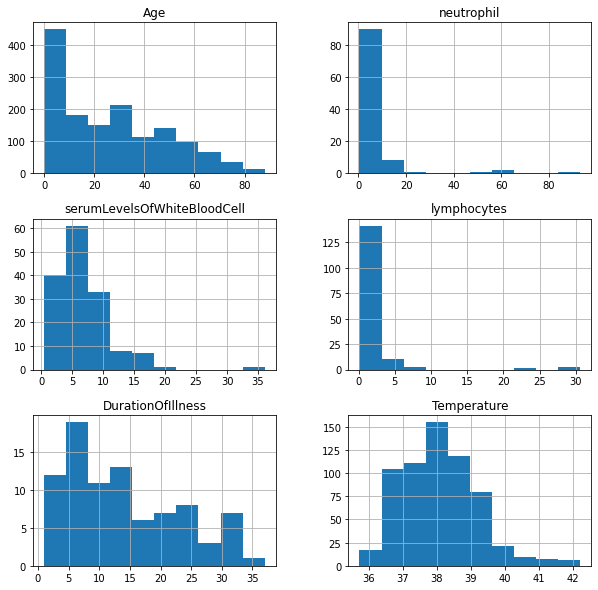

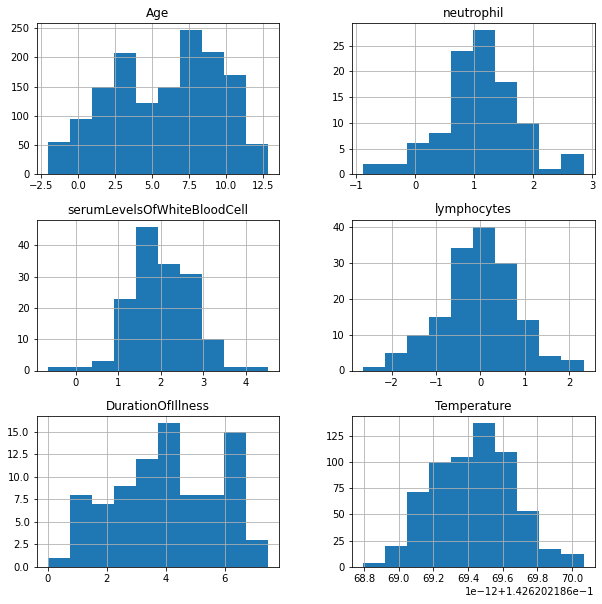

In [18]:
from sklearn.preprocessing import PowerTransformer

boxcox_transformer = PowerTransformer(method='box-cox', standardize=False)
pd.DataFrame(covid_flu[numerical_columns]).hist(figsize=(10, 10))

pd.DataFrame(
    boxcox_transformer.fit_transform(covid_flu[numerical_columns]), 
    columns=numerical_columns
).hist(figsize=(10, 10))

name = 'bunch of histograms after box cox'
plt.savefig(f'{name}.svg', dpi=500)
plt.savefig(f'{name}.png', dpi=500)


In [19]:
boxcox_transformer.lambdas_

array([ 0.41035252, -0.22261792,  0.12473207, -0.24415703,  0.36376996,
       -7.01162857])

In [20]:
# before any transformations, scales are all over the place as are means and standard deviations
covid_flu[numerical_columns].describe()   

,Age,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,DurationOfIllness,Temperature
count,1454.000000,103.000000,151.000000,156.000000,87.000000,628.000000
mean,26.481040,6.854078,6.885159,1.850154,13.988506,38.068312
std,21.487982,12.690131,4.346668,3.956668,9.043171,1.094468
min,0.010000,0.446000,0.500000,0.130000,1.000000,35.722222
25%,7.010000,2.160000,3.995000,0.637500,7.000000,37.222222
50%,24.010000,3.310000,5.690000,0.905500,12.000000,38.000000
75%,42.010000,6.645000,9.155000,1.605000,20.000000,38.722222
max,88.010000,93.000000,36.070000,30.600000,37.000000,42.222222


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'neutrophil'}>],
       [<AxesSubplot:title={'center':'serumLevelsOfWhiteBloodCell'}>,
        <AxesSubplot:title={'center':'lymphocytes'}>],
       [<AxesSubplot:title={'center':'DurationOfIllness'}>,
        <AxesSubplot:title={'center':'Temperature'}>]], dtype=object)

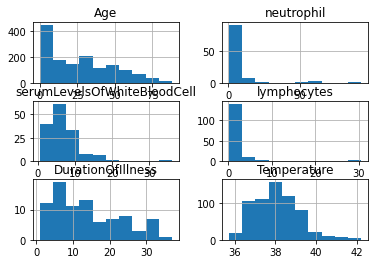

In [21]:
covid_flu[numerical_columns].hist()


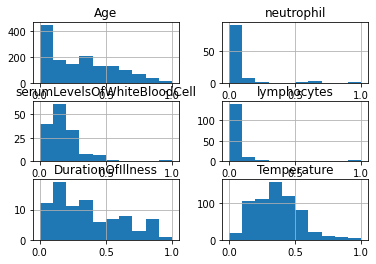

In [22]:
from sklearn.preprocessing import MinMaxScaler
pd.DataFrame(  # mean of 0 and std of 1 but ranges are different (see min and max)
    MinMaxScaler().fit_transform(covid_flu[numerical_columns]),
    columns=numerical_columns
).hist()

name = 'bunch fo histograms after min max'
plt.savefig(f'{name}.svg', dpi=500)
plt.savefig(f'{name}.png', dpi=500)


In [23]:
from sklearn.preprocessing import StandardScaler

pd.DataFrame(  # mean of 0 and std of 1 but ranges are different (see min and max)
    StandardScaler().fit_transform(covid_flu[numerical_columns]),
    columns=numerical_columns
).describe()

,Age,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,DurationOfIllness,Temperature
count,1.454000e+03,1.030000e+02,1.510000e+02,1.560000e+02,8.700000e+01,6.280000e+02
mean,7.330221e-17,-1.185675e-17,-1.426379e-16,-5.622283e-17,-4.211191e-17,1.704228e-15
std,1.000344e+00,1.004890e+00,1.003328e+00,1.003221e+00,1.005797e+00,1.000797e+00
min,-1.232324e+00,-5.074347e-01,-1.473866e+00,-4.361482e-01,-1.444604e+00,-2.145299e+00
25%,-9.064480e-01,-3.717087e-01,-6.671264e-01,-3.074706e-01,-7.772737e-01,-7.736770e-01
50%,-1.150359e-01,-2.806439e-01,-2.758748e-01,-2.395187e-01,-2.211651e-01,-6.246559e-02
75%,7.229298e-01,-1.655618e-02,5.239403e-01,-6.215921e-02,6.686088e-01,5.979450e-01
max,2.864398e+00,6.821614e+00,6.736646e+00,7.289577e+00,2.559378e+00,3.798396e+00


In [24]:
pd.DataFrame(  # mean and std are different but min and max are 0s and 1s
    MinMaxScaler().fit_transform(covid_flu[numerical_columns]),
    columns=numerical_columns
).describe()

,Age,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,DurationOfIllness,Temperature
count,1454.000000,103.000000,151.000000,156.000000,87.000000,628.000000
mean,0.300807,0.069236,0.179510,0.056454,0.360792,0.360937
std,0.244182,0.137111,0.122200,0.129855,0.251199,0.168380
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.079545,0.018519,0.098257,0.016656,0.166667,0.230769
50%,0.272727,0.030944,0.145909,0.025451,0.305556,0.350427
75%,0.477273,0.066977,0.243323,0.048408,0.527778,0.461538
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
categorical_types = ['O']  # Just the "object" type

categorical_columns = covid_flu.select_dtypes(include=categorical_types).columns.tolist()

categorical_columns.remove('Diagnosis')  # our response variable

for categorical_column in categorical_columns:
    print('=======')
    print(categorical_column)
    print('=======')
    print(covid_flu[categorical_column].value_counts(dropna=False))
    

InitialPCRDiagnosis
NaN    1378
Yes     100
No        4
Name: InitialPCRDiagnosis, dtype: int64
Sex
M      748
F      658
NaN     76
Name: Sex, dtype: int64
CReactiveProteinLevels
NaN      1345
0.5         3
8           3
15          3
0.4         2
         ... 
8.3         1
5.78        1
57.9        1
26.08       1
89.94       1
Name: CReactiveProteinLevels, Length: 121, dtype: int64
CTscanResults
NaN    1323
Yes     144
No       15
Name: CTscanResults, dtype: int64
RiskFactors
NaN                      1273
asthma                     36
immuno                     21
pneumonia                  21
diabetes                   16
                         ... 
hypertention                1
Renal Disease, athero       1
diabetes, obesity           1
Fatty Liver                 1
pneumonia                   1
Name: RiskFactors, Length: 64, dtype: int64
GroundGlassOpacity
NaN    1389
Yes      90
No        3
Name: GroundGlassOpacity, dtype: int64
Diarrhea
NaN    1032
No      340
Yes     110
N

In [26]:
# Turn our Sex column into a binary column
covid_flu['Female'] = covid_flu['Sex'] == 'F'
del covid_flu['Sex']

In [27]:
covid_flu = covid_flu.replace({'Yes': True, 'No': False})  # replace yes and  no with True / False

covid_flu.head(3)

,Diagnosis,InitialPCRDiagnosis,Age,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,CReactiveProteinLevels,DurationOfIllness,CTscanResults,RiskFactors,GroundGlassOpacity,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Temperature,Fatigue,Female
0,H1N1,NaN,67.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,NaN,False,NaN,38.111111,False,True
1,H1N1,NaN,29.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,H1N1,NaN,22.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [28]:
# construct a new categorical column that is an amalgamation of several flu symptoms
covid_flu['FluSymptoms'] = covid_flu[['Diarrhea', 'Fever', 'Coughing', 'SoreThroat', 'NauseaVomitting', 'Fatigue']].sum(axis=1) >= 2

print(covid_flu['FluSymptoms'].value_counts())

print(covid_flu['FluSymptoms'].isnull().sum())  # no missing values

binary_features = [  # aggregate all binary columns in a list
    'Female', 'GroundGlassOpacity', 'CTscanResults', 'Diarrhea', 'Fever', 'FluSymptoms',
    'Coughing', 'SoreThroat', 'NauseaVomitting', 'Fatigue', 'InitialPCRDiagnosis'
]

False    753
True     729
Name: FluSymptoms, dtype: int64
0


In [39]:
covid_flu['FluSymptoms'] = covid_flu[['Diarrhea', 'Fever', 'Coughing', 'SoreThroat', 'NauseaVomitting', 'Fatigue']].sum(axis=1) >= 1

print(covid_flu['FluSymptoms'].value_counts())


True     930
False    552
Name: FluSymptoms, dtype: int64
ERROR! Session/line number was not unique in database. History logging moved to new session 1157


In [29]:
# A custom data transformer to deal with our messy risk factor column

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MultiLabelBinarizer  # class to help make dummy variables
from functools import reduce

class DummifyRiskFactor(BaseEstimator,TransformerMixin):
    def __init__(self):
        self.label_binarizer = None
        
    def parse_risk_factors(self, comma_sep_factors):
        ''' asthma,heart disease -> ['asthma', 'heart disease'] '''
        try:
            return [s.strip().lower() for s in comma_sep_factors.split(',')]
        except:
            return []
    
    def fit(self, X, y=None):
        self.label_binarizer = MultiLabelBinarizer()
        self.label_binarizer.fit(X.apply(self.parse_risk_factors))  # create dummy variable for each risk factor
        return self
    
    def transform(self, X, y=None):
        return self.label_binarizer.transform(X.apply(self.parse_risk_factors))

In [30]:
drf = DummifyRiskFactor()

risks = drf.fit_transform(covid_flu['RiskFactors'])

print(risks.shape)

pd.DataFrame(risks, columns=drf.label_binarizer.classes_)

(1482, 41)


,asthma,athero,atopic dermatitis and repetitive respiratory infections,begin tumor (removed),chronic,chronic endrocrine disorder,chronic liver dieseas,chronic liver disorder,chronic neurological disorders,chronic obstructive pulmonary disease,...,lung disease,myxoma of abdominal cavity,obesity,pneumomediastinum and subcutaneous emphysema,pneumonia,pre-eclampsia,prom,renal disease,respiratory disease,rheumatoid arthritis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1479,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1480,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
from sklearn.model_selection import train_test_split

X, y = covid_flu.drop(['Diagnosis'], axis=1), covid_flu['Diagnosis']

x_train, x_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=0, test_size=.2
)

In [32]:
y_train.value_counts(normalize=True)

H1N1       0.723207
COVID19    0.276793
Name: Diagnosis, dtype: float64

In [33]:
y_test.value_counts(normalize=True)

H1N1       0.723906
COVID19    0.276094
Name: Diagnosis, dtype: float64

In [34]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline, FeatureUnion

# deal with risk factors

risk_factor_pipeline = Pipeline(
    [
        ('select_risk_factor', FunctionTransformer(lambda df: df['RiskFactors'])),
        ('dummify', DummifyRiskFactor())
    ]
)

# deal with binary columns

binary_pipeline = Pipeline(
    [
        ('select_categorical_features', FunctionTransformer(lambda df: df[binary_features])),
        ('fillna', SimpleImputer(strategy='constant', fill_value=False))  # assume missing values are not present
    ]
)

# deal with numerical columns

numerical_pipeline = Pipeline(
    [
        ('select_numerical_features', FunctionTransformer(lambda df: df[numerical_columns])),
        ('impute', SimpleImputer(strategy='median')),
    ]
)

In [35]:
# only using numerical values has a good precision on COVID class but awful recall..
simple_grid_search(x_train, y_train, x_test, y_test, numerical_pipeline)

Parsing took 0.01 seconds
Training took 13.73 seconds
              precision    recall  f1-score   support

     COVID19       0.76      0.70      0.73        82
        H1N1       0.89      0.92      0.90       215

    accuracy                           0.86       297
   macro avg       0.82      0.81      0.81       297
weighted avg       0.85      0.86      0.85       297

Overall took 13.76 seconds


ExtraTreesClassifier()

In [36]:
# only using risk factors has a horrible recall and accuracy is barely higher than the null accuracy
simple_grid_search(x_train, y_train, x_test, y_test, risk_factor_pipeline)

Parsing took 0.01 seconds


/usr/local/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:860: UserWarning: unknown class(es) ['atopic dermatitis and repetitive respiratory infections', 'begin tumor (removed)', 'chronic liver disorder', 'chronic neurological disorders', 'fatty liver', 'hypertention', 'lung disease', 'pneumomediastinum and subcutaneous emphysema', 'rheumatoid arthritis'] will be ignored
  warnings.warn('unknown class(es) {0} will be ignored'


Training took 12.04 seconds
              precision    recall  f1-score   support

     COVID19       0.73      0.10      0.17        82
        H1N1       0.74      0.99      0.85       215

    accuracy                           0.74       297
   macro avg       0.73      0.54      0.51       297
weighted avg       0.74      0.74      0.66       297

Overall took 12.05 seconds


ExtraTreesClassifier(n_estimators=10)

In [37]:
# only using binary columns is also not performing well
simple_grid_search(x_train, y_train, x_test, y_test, binary_pipeline)

Parsing took 0.01 seconds
Training took 12.34 seconds
              precision    recall  f1-score   support

     COVID19       0.83      0.59      0.69        82
        H1N1       0.86      0.95      0.90       215

    accuracy                           0.85       297
   macro avg       0.84      0.77      0.79       297
weighted avg       0.85      0.85      0.84       297

Overall took 12.37 seconds


ExtraTreesClassifier(max_depth=10, n_estimators=50)

In [38]:
print(simple_grid_search(x_train, y_train, x_test, y_test, binary_pipeline))

Parsing took 0.01 seconds
Training took 11.96 seconds
              precision    recall  f1-score   support

     COVID19       0.78      0.61      0.68        82
        H1N1       0.86      0.93      0.90       215

    accuracy                           0.85       297
   macro avg       0.82      0.77      0.79       297
weighted avg       0.84      0.85      0.84       297

Overall took 11.99 seconds
ExtraTreesClassifier(max_depth=10)


In [38]:
# Use our cross-validation function to show the best classification report (best == highest test set accuracy)
# We  will use this as a baseline performance indicator for our next feature engineering attempts

simple_fe = FeatureUnion([  # put all of our features together
    ('risk_factors', risk_factor_pipeline),
    ('binary_pipeline', binary_pipeline),
    ('numerical_pipeline', numerical_pipeline)
])

simple_fe.fit_transform(x_train, y_train).shape

best_model = simple_grid_search(x_train, y_train, x_test, y_test, simple_fe)

Parsing took 0.04 seconds


/usr/local/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:860: UserWarning: unknown class(es) ['atopic dermatitis and repetitive respiratory infections', 'begin tumor (removed)', 'chronic liver disorder', 'chronic neurological disorders', 'fatty liver', 'hypertention', 'lung disease', 'pneumomediastinum and subcutaneous emphysema', 'rheumatoid arthritis'] will be ignored
  warnings.warn('unknown class(es) {0} will be ignored'
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3427, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-39-30dae12610f6>", line 12, in <module>
    best_model = simple_grid_search(x_train, y_train, x_test, y_test, simple_fe)
  File "<ipython-input-2-fad9a2732ae0>", line 28, in simple_grid_search
    model_grid_search.fit(parsed_x_train, y_train)
  File "/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_search.py", line 841, in fit
    self._run_search(evaluate_candidates)
  File "/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_search.py", line 1288, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_search.py", line 795, in evalua

TypeError: object of type 'NoneType' has no len()

In [ ]:
numerical_pipeline = Pipeline(
    [
        ('select_numerical_features', FunctionTransformer(lambda df: df[numerical_columns])),
        ('impute', SimpleImputer(strategy='mean')),  # try mean instead of median
        ('scale', StandardScaler())  # scale our numerical features
    ]
)

simple_fe = FeatureUnion([
    ('risk_factors', risk_factor_pipeline),
    ('binary_pipeline', binary_pipeline),
    ('numerical_pipeline', numerical_pipeline)
])

# gained some precision for the COVID class
best_model = simple_grid_search(x_train, y_train, x_test, y_test, simple_fe)

In [ ]:
numerical_pipeline = Pipeline(
    [
        ('select_numerical_features', FunctionTransformer(lambda df: df[numerical_columns])),
        ('impute', SimpleImputer(strategy='constant', fill_value=999)),  # try a constant 999
        ('scale', StandardScaler())
    ]
)

simple_fe = FeatureUnion([
    ('risk_factors', risk_factor_pipeline),
    ('binary_pipeline', binary_pipeline),
    ('numerical_pipeline', numerical_pipeline)
])

# gained some precision for the COVID class
best_model = simple_grid_search(x_train, y_train, x_test, y_test, simple_fe)

In [ ]:
# Apply box-cox transformation after scaling data and impute using gaussian end of tail

numerical_pipeline = Pipeline(
    [
        ('select_numerical_features', FunctionTransformer(lambda df: df[numerical_columns])),
        ('box-cox', PowerTransformer(method='box-cox', standardize=True)),
        ('turn_into_df', FunctionTransformer(lambda matrix: pd.DataFrame(matrix))),  # turn back into dataframe
        ('end_of_tail', EndTailImputer(imputation_method='gaussian'))

    ]
)

simple_fe = FeatureUnion([
    ('risk_factors', risk_factor_pipeline),
    ('binary_pipeline', binary_pipeline),
    ('numerical_pipeline', numerical_pipeline)
])

# looking better
best_model = simple_grid_search(x_train, y_train, x_test, y_test, simple_fe)

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer  # we will use this module for binning our data

# uniform will create bins of equal width
binner = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
binned_data = binner.fit_transform(covid_flu[['Age']].dropna())
pd.Series(binned_data.reshape(-1,)).plot(
    title='Age (Uniform Binning)', kind='hist', xlabel='Age'
)

name = 'uniform'
plt.savefig(f'{name}.svg', dpi=500)
plt.savefig(f'{name}.png', dpi=500)


In [ ]:
# quantile will create bins of roughly equal height
binner = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
binned_data = binner.fit_transform(covid_flu[['Age']].dropna())
pd.Series(binned_data.reshape(-1,)).plot(
    title='Age (Quantile Binning)', kind='hist', xlabel='Age'
)

name = 'quantile'
plt.savefig(f'{name}.svg', dpi=500)
plt.savefig(f'{name}.png', dpi=500)


In [ ]:
# kmeans will run a k-means cluster on each feature independently
binner = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
binned_data = binner.fit_transform(covid_flu[['Age']].dropna())
pd.Series(binned_data.reshape(-1,)).plot(
    title='Age (KMeans Binning)', kind='hist', xlabel='Age'
)

name = 'kmeans'
plt.savefig(f'{name}.svg', dpi=500)
plt.savefig(f'{name}.png', dpi=500)


In [ ]:
numerical_pipeline = Pipeline(  # bin data after scaling and imputing
    [
        ('select_numerical_features', FunctionTransformer(lambda df: df[numerical_columns])),
        ('box-cox', PowerTransformer(method='box-cox', standardize=True)),
        ('turn_into_df', FunctionTransformer(lambda matrix: pd.DataFrame(matrix))),  # turn back into dataframe
        ('end_of_tail', EndTailImputer(imputation_method='gaussian')),
        ('ordinal_bins', KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans'))
    ]
)

simple_fe = FeatureUnion([
    ('risk_factors', risk_factor_pipeline),
    ('binary_pipeline', binary_pipeline),
    ('numerical_pipeline', numerical_pipeline)
])

# so far one of our best set of results!
best_model = simple_grid_search(x_train, y_train, x_test, y_test, simple_fe)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

risk_factor_pipeline = Pipeline(  # add feature selection
    [
        ('select_risk_factor', FunctionTransformer(lambda df: df['RiskFactors'])),
        ('dummify', DummifyRiskFactor()),
        ('mutual_info', SelectKBest(mutual_info_classif, k=20)),  # feature selection based on mutual information
    ]
)


simple_fe = FeatureUnion([
    ('risk_factors', risk_factor_pipeline),
    ('binary_pipeline', binary_pipeline),
    ('numerical_pipeline', numerical_pipeline)
])

best_model = simple_grid_search(x_train, y_train, x_test, y_test, simple_fe)

In [ ]:
from sklearn.feature_selection import chi2

risk_factor_pipeline = Pipeline(  # add feature selection
    [
        ('select_risk_factor', FunctionTransformer(lambda df: df['RiskFactors'])),
        ('dummify', DummifyRiskFactor()),
        ('chi2', SelectKBest(chi2, k=10))  # use chi2 to select features
    ]
)


simple_fe = FeatureUnion([
    ('risk_factors', risk_factor_pipeline),
    ('binary_pipeline', binary_pipeline),
    ('numerical_pipeline', numerical_pipeline)
])

best_model = simple_grid_search(x_train, y_train, x_test, y_test, simple_fe)


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier

risk_factor_pipeline = Pipeline(
    [
        ('select_risk_factor', FunctionTransformer(lambda df: df['RiskFactors'])),
        ('dummify', DummifyRiskFactor()),
        # use a decision tree classifier to select features
        ('tree_selector', SelectFromModel(max_features=20, estimator=DecisionTreeClassifier()))
    ]
)


simple_fe = FeatureUnion([
    ('risk_factors', risk_factor_pipeline),
    ('binary_pipeline', binary_pipeline),
    ('numerical_pipeline', numerical_pipeline)
])

# let's stop here
best_model = simple_grid_search(x_train, y_train, x_test, y_test, simple_fe)

In [ ]:
# Let's take a look at our pipeline
simple_fe.transformer_list